# Phase Transition Final Project

Kawasaki Dynamics

- Ising model have fixed spins. Don't change during simulation, but allowed to move (as in swap places)
- Movement Rules
1) For particles, A and B, if spins are the same, do nothing
2) if spins A and B are different, then calculate current system energy (E) and system energy if places were swapped (E')
3) Calculate probabilities according to Boltzmann distributions, p and p' respectively
4) With probability, p'/ p + p', if it hits, then swap the particles. 


Goal is to decrease the energy for every step


Link: https://rf.mokslasplius.lt/kawasaki-ising-model/

JS link: https://github.com/physrisk/website-source/blob/main/uploads/models/physics-models/ising-model/kawasaki.js

# 
Farkas Paper Notes

Simulation Details

MxN lattice (M = 400; N = 80)
periodic in x-direction
non-periodic in y-direction
3 main states (active, inactive, and refractory), but it can be split into more states 

Total activation effect factors in local and global interactions



# Wave Propagation in All Directions


MovieWriter imagemagick unavailable; using Pillow instead.


Animation saved as MexicanWave.gif


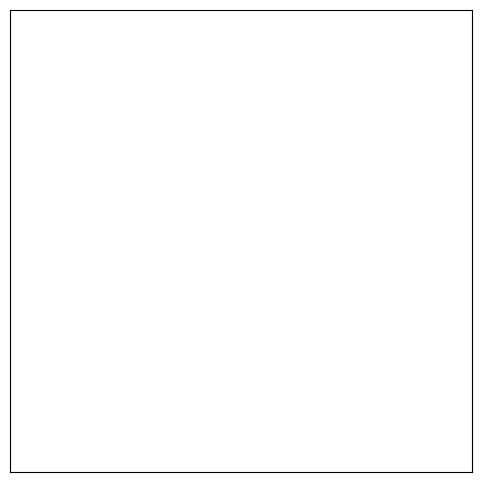

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

#Parameters
GRID_SIZE = (50,50) #Rows, Columns
THRESHOLD = 1.0 #Activation threshold 
SPONTANEOUS_PROB = 0.00
REFRACTORY_PERIOD = 20  
CUTOFF_RADIUS = 3  
MAX_ITERATIONS = 80   
SENSITIVITY_CONTROL = 1.0  #Control parameter that affects wave propagation  
R = 3.0 #Characteristic length for local interactions

# Initialize grid: 0 (excitable), 1 (active), -1 (refractory)
lattice = np.zeros(GRID_SIZE, dtype=int)
refractory_counters = np.zeros(GRID_SIZE, dtype=int)  # Track refractory time

#Small little nucleation site
center_x, center_y = GRID_SIZE[0] // 2, GRID_SIZE[1] // 2
lattice[center_x - 1:center_x + 1, center_y - 1:center_y + 1] = 1



#Create a weight matrix for the Mexican wave as this describes neighbor influence
def create_weight_matrix(radius):
    weight_matrix = np.zeros((2*radius+1, 2*radius+1))
    for dx in range(-radius, radius + 1):
        for dy in range(-radius, radius + 1):
            distance = np.sqrt(dx**2 + dy**2)
            if distance <= radius:
                weight_matrix[dx + radius, dy + radius] = np.exp(-distance / R)
    return weight_matrix    

weights = create_weight_matrix(CUTOFF_RADIUS)



#Global interactions
def compute_global_interaction(lattice, x, y, sensitivity_control):
    rows, cols = lattice.shape
    total_active_distance = 0
    weight_sum = 0

    for j in range(cols):
        if j != y:
            distance = min(abs(j - y), cols - abs(j - y))
            weight = np.exp(-distance / R)  
            total_active_distance += weight * (lattice[x, j] == 1)
            weight_sum += weight


    x_average = total_active_distance / (weight_sum + 1e-10)
    velocity = x_average - y


    if velocity < 0:
        return np.exp(-sensitivity_control * velocity)
    else:
        return 1



def update_wave(lattice, refractory_counters):
    new_grid = np.copy(lattice)
    rows, cols, = lattice.shape

    for x in range(rows):
        for y in range(cols):
            if lattice[x, y] == 0:
                #Local influence
                local_influence = 0
                for i in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for j in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx = x + i
                        ny = (y + j) % cols #Periodic boundary conditions

                        if 0 <= nx < rows and lattice[nx, ny] == 1:
                            local_influence += weights[i + CUTOFF_RADIUS, j + CUTOFF_RADIUS]

                #Global influence
                global_influence = compute_global_interaction(lattice, x, y, SENSITIVITY_CONTROL)

                #Total influence
                total_influence = local_influence * global_influence


                # Activation conditions
                if total_influence >= THRESHOLD:
                    new_grid[x,y] = 1 #Activate
            elif lattice[x, y] == 1:
                new_grid[x,y] = -1 #Refractory state
                refractory_counters[x, y] = REFRACTORY_PERIOD #Set refractory counter
            elif lattice[x,y] == -1:
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0

    return new_grid

# Simulate the Mexican wave
fig, ax = plt.subplots(figsize=(12,6))
cmap = ListedColormap(['red', 'white', 'black'])
norm = plt.Normalize(vmin=-1, vmax=1)

cax = ax.matshow(lattice, cmap=cmap, norm=norm)
plt.xticks([])
plt.yticks([])


def animate(frame):
    global lattice, refractory_counters
    lattice = update_wave(lattice, refractory_counters)
    cax.set_data(lattice)
    return [cax]

ani = animation.FuncAnimation(fig, animate, frames=MAX_ITERATIONS, interval=200, blit=True)

ani.save('MexicanWave.gif', writer='imagemagick', fps=5)

print('Animation saved as MexicanWave.gif')





# Wave Propagation in One Direction - To Simulate Mexican Wave